# Models: RandomForestClassifier


# 1. Import Libraries.

In this section we Import some of the initial Libraries we will need.

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import os


# 2. Lets use our Classifier dataset for this model.

"X_Ylabels_17_21.csv"

Random Forests can handle a large number of feautures effectively so we will not use our post PCA dataset.

Binary labels for the years 2017 to 2021 signifying whether each stock outperformed (1) or underperformed (0) the equal weighted Nasdaq 100 that year.

See: https://github.com/SheepBoss/Project-on-ML-dataset-and-models-for-stock-performance-predictions-based-on-financial-ratios/blob/main/ML_dataset_for%20Nasdaq100stocks_financial%20ratios_with%20labels.ipynb


In [3]:
X_Y = pd.read_csv("X_Ylabels_17_21.csv")
X_Y



,asset_turnover,buyback_yield,capex_to_revenue,cash_ratio,cash_to_debt,cogs_to_revenue,mscore,zscore,current_ratio,days_inventory,...,price_to_earnings_ratio_nri,price_earnings_growth_ratio,price_to_free_cashflow,price_to_operating_cashflow,rate_of_return,scaled_net_operating_assets,yoy_ebitda_growth,yoy_eps_growth,yoy_revenue_growth,0
0,0.660000,4.090000,0.050000,0.740000,0.640000,0.620000,-2.500000,3.620000,1.280000,9.040000,...,16.730000,1.250000,15.630000,12.600000,19.240000,0.550000,9.360000,10.830000,11.340000,0
1,0.724932,2.035574,0.040000,1.410274,2.648413,0.250000,-2.543382,6.686479,2.332192,89.855094,...,44.909524,10.936250,33.836721,35.271493,14.260952,0.482917,26.097361,46.020147,19.277917,0
2,0.540000,1.080000,0.020000,1.650000,3.090000,0.140000,-2.490000,10.810000,2.050000,89.855094,...,52.320000,2.420000,32.410000,30.420000,21.820000,0.360000,39.030000,45.690000,25.510000,1
3,0.360000,0.140000,0.040000,0.660000,0.130000,0.400000,-1.490000,2.640000,1.470000,81.440000,...,39.870000,4.440000,33.680000,27.720000,11.950000,2.130000,25.600000,-17.030000,36.640000,0
4,0.724932,2.035574,0.086892,1.410274,2.648413,0.437534,-2.543382,6.686479,2.332192,89.855094,...,44.909524,10.936250,33.836721,35.271493,14.260952,0.482917,26.097361,46.020147,19.277917,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.570000,0.250000,0.010000,0.050000,0.040000,0.790000,-2.260000,2.720000,0.720000,28.090000,...,22.070000,6.195821,10.530000,7.910000,-5.110000,0.640000,65.800000,463.460000,10.370000,0
506,0.560000,1.733289,0.060000,0.830000,1.580000,0.280000,-3.240000,6.120000,1.120000,83.647794,...,63.153488,6.195821,53.290000,42.510000,12.240260,0.290000,156.700000,43.870000,14.100000,0
507,0.240000,-0.990000,0.320000,0.030000,0.010000,0.610000,-1.792316,1.030000,0.840000,26.040000,...,22.870000,8.730000,52.026374,16.700000,-1.040000,0.750000,3.480000,6.090000,13.930000,1
508,0.810000,-1.810000,0.030000,3.370000,40.040000,0.310000,-0.480000,47.500000,3.800000,83.647794,...,165.360000,6.195821,80.070000,75.390000,12.240260,-0.220000,17.709700,52.306596,263.130000,0


In [4]:
df_shuffled = X_Y.iloc[np.random.permutation(len(X_Y))]
num_rows = len(df_shuffled)
df_train = df_shuffled[:int(num_rows * 0.85)]
df_test = df_shuffled[int(num_rows * 0.85):]




X_train = df_train.iloc[:,:-1]
Y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
Y_test = df_test.iloc[:,-1]





# RandomForestClassifier

In [5]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV

In [6]:
# Define the parameter ranges for the three arguments
param_range1 = [100, 125, 150]  # example values for argument 1
param_range2 = [5, 6, 7]      # example values for argument 2
param_range3 = [2, 3, 4] # example values for argument 3

best_accuracy = 0.0
best_params = {}

# Nested loops to iterate through all parameter combinations
for param1 in param_range1:
    for param2 in param_range2:
        for param3 in param_range3:
            # Create a Random Forest model with the current parameter combination
            model = RandomForestClassifier(n_estimators=param1, max_depth=param2, min_samples_split=param3, random_state=42)

            # Fit the model to the training data
            model.fit(X_train, Y_train)

            # Make predictions on the test data
            y_pred = model.predict(X_test)

            # Calculate the accuracy score for the current parameter combination
            accuracy = accuracy_score(Y_test, y_pred)

            # Check if the current accuracy is better than the best accuracy so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_estimators': param1, 'max_depth': param2, 'min_samples_split': param3}

# Print the best accuracy score and the corresponding parameter combination
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.6233766233766234
Best Parameters: {'n_estimators': 125, 'max_depth': 7, 'min_samples_split': 2}


In [7]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, random_state = 42)

# Fit the model to the training data

rf_classifier.fit(X_train, Y_train)


# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6103896103896104


# Investment Performance of the Model

In [8]:
X = pd.read_csv("X_Ylabels_17_21.csv")
X = X.iloc[:,:-1]
X

,asset_turnover,buyback_yield,capex_to_revenue,cash_ratio,cash_to_debt,cogs_to_revenue,mscore,zscore,current_ratio,days_inventory,...,price_to_earnings_ratio,price_to_earnings_ratio_nri,price_earnings_growth_ratio,price_to_free_cashflow,price_to_operating_cashflow,rate_of_return,scaled_net_operating_assets,yoy_ebitda_growth,yoy_eps_growth,yoy_revenue_growth
0,0.660000,4.090000,0.050000,0.740000,0.640000,0.620000,-2.500000,3.620000,1.280000,9.040000,...,16.730000,16.730000,1.250000,15.630000,12.600000,19.240000,0.550000,9.360000,10.830000,11.340000
1,0.724932,2.035574,0.040000,1.410274,2.648413,0.250000,-2.543382,6.686479,2.332192,89.855094,...,44.940635,44.909524,10.936250,33.836721,35.271493,14.260952,0.482917,26.097361,46.020147,19.277917
2,0.540000,1.080000,0.020000,1.650000,3.090000,0.140000,-2.490000,10.810000,2.050000,89.855094,...,52.320000,52.320000,2.420000,32.410000,30.420000,21.820000,0.360000,39.030000,45.690000,25.510000
3,0.360000,0.140000,0.040000,0.660000,0.130000,0.400000,-1.490000,2.640000,1.470000,81.440000,...,39.870000,39.870000,4.440000,33.680000,27.720000,11.950000,2.130000,25.600000,-17.030000,36.640000
4,0.724932,2.035574,0.086892,1.410274,2.648413,0.437534,-2.543382,6.686479,2.332192,89.855094,...,44.940635,44.909524,10.936250,33.836721,35.271493,14.260952,0.482917,26.097361,46.020147,19.277917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.570000,0.250000,0.010000,0.050000,0.040000,0.790000,-2.260000,2.720000,0.720000,28.090000,...,17.320000,22.070000,6.195821,10.530000,7.910000,-5.110000,0.640000,65.800000,463.460000,10.370000
506,0.560000,1.733289,0.060000,0.830000,1.580000,0.280000,-3.240000,6.120000,1.120000,83.647794,...,61.101047,63.153488,6.195821,53.290000,42.510000,12.240260,0.290000,156.700000,43.870000,14.100000
507,0.240000,-0.990000,0.320000,0.030000,0.010000,0.610000,-1.792316,1.030000,0.840000,26.040000,...,22.870000,22.870000,8.730000,52.026374,16.700000,-1.040000,0.750000,3.480000,6.090000,13.930000
508,0.810000,-1.810000,0.030000,3.370000,40.040000,0.310000,-0.480000,47.500000,3.800000,83.647794,...,165.360000,165.360000,6.195821,80.070000,75.390000,12.240260,-0.220000,17.709700,52.306596,263.130000


In [9]:
Yact = pd.read_csv("perfs17_21.csv")
Yact

,0
0,0.132137
1,0.000000
2,0.233293
3,0.155163
4,0.407649
...,...
505,-0.227608
506,-0.137476
507,-0.065540
508,-0.370127


In [10]:
def evaluate_model3(model, X_data, perfs):
    # Apply the model to the X data to generate predicted labels
    y_pred = model.predict(X_data)

    # Create empty lists to store the actual performance values for each year
    perf_1_list_Yr1 = []
    perf_0_list_Yr1 = []
    perf_1_list_Yr2 = []
    perf_0_list_Yr2 = []
    perf_1_list_Yr3 = []
    perf_0_list_Yr3 = []
    perf_1_list_Yr4 = []
    perf_0_list_Yr4 = []
    perf_1_list_Yr5 = []
    perf_0_list_Yr5 = []

    # Loop through the predicted labels and lookup the actual performances
    for i, label in enumerate(y_pred):
        # Get the actual performance for the corresponding label
        actual_perf = perfs.iloc[i, 0]  # Assuming perfs is a DataFrame with 510 rows and 1 column

        # Determine the year based on the index i
        year = i // 102 + 1

        # Append the actual performance to the corresponding list based on the year and label
        if year == 1:
            if label == 1:
                perf_1_list_Yr1.append(actual_perf)
            else:
                perf_0_list_Yr1.append(actual_perf)
        elif year == 2:
            if label == 1:
                perf_1_list_Yr2.append(actual_perf)
            else:
                perf_0_list_Yr2.append(actual_perf)
        elif year == 3:
            if label == 1:
                perf_1_list_Yr3.append(actual_perf)
            else:
                perf_0_list_Yr3.append(actual_perf)
        elif year == 4:
            if label == 1:
                perf_1_list_Yr4.append(actual_perf)
            else:
                perf_0_list_Yr4.append(actual_perf)
        elif year == 5:
            if label == 1:
                perf_1_list_Yr5.append(actual_perf)
            else:
                perf_0_list_Yr5.append(actual_perf)

    # Calculate the mean performance for each list
    mean_perf_1_Yr1 = sum(perf_1_list_Yr1) / len(perf_1_list_Yr1)
    mean_perf_0_Yr1 = sum(perf_0_list_Yr1) / len(perf_0_list_Yr1)
    mean_perf_1_Yr2 = sum(perf_1_list_Yr2) / len(perf_1_list_Yr2)
    mean_perf_0_Yr2 = sum(perf_0_list_Yr2) / len(perf_0_list_Yr2)
    mean_perf_1_Yr3 = sum(perf_1_list_Yr3) / len(perf_1_list_Yr3)
    mean_perf_0_Yr3 = sum(perf_0_list_Yr3) / len(perf_0_list_Yr3)
    mean_perf_1_Yr4 = sum(perf_1_list_Yr4) / len(perf_1_list_Yr4)
    mean_perf_0_Yr4 = sum(perf_0_list_Yr4) / len(perf_0_list_Yr4)
    mean_perf_1_Yr5 = sum(perf_1_list_Yr5) / len(perf_1_list_Yr5)
    mean_perf_0_Yr5 = sum(perf_0_list_Yr5) / len(perf_0_list_Yr5)


    # Calculate the 5-year performance for label 1 and label 0
    five_year_perf_1 = (1 + mean_perf_1_Yr1) * (1 + mean_perf_1_Yr2) * (1 + mean_perf_1_Yr3) * (1 + mean_perf_1_Yr4) * (1 + mean_perf_1_Yr5)
    five_year_perf_0 = (1 + mean_perf_0_Yr1) * (1 + mean_perf_0_Yr2) * (1 + mean_perf_0_Yr3) * (1 + mean_perf_0_Yr4) * (1 + mean_perf_0_Yr5)
    five_year_perf_LS = (1 + (mean_perf_1_Yr1 - mean_perf_0_Yr1)) * (1 + (mean_perf_1_Yr2 - mean_perf_0_Yr2)) * (1 + (mean_perf_1_Yr3 - mean_perf_0_Yr3)) * (1 + (mean_perf_1_Yr4 - mean_perf_0_Yr4)) * (1 + (mean_perf_1_Yr5 - mean_perf_0_Yr5))
    cagr_Long = (five_year_perf_1 / 1) ** (1 / 5) - 1
    cagr_Short = (five_year_perf_0 / 1) ** (1 / 5) - 1
    cagr_LongShort = (five_year_perf_LS / 1) ** (1 / 5) - 1
    
    # Print the lists and the mean and 5-year performance values
    print("5-year performance (Label 1):", five_year_perf_1)
    print("5-year performance Long on 1s cagr:", cagr_Long)
    print("5-year performance (Label 0):", five_year_perf_0)
    print("5-year performance Long on Os cagr:", cagr_Short)
    print("5-year performance LS:", five_year_perf_LS)
    print("5-year performance LS cagr:", cagr_LongShort)
    
    return cagr_Long, cagr_Short, cagr_LongShort
    

In [11]:
evaluate_model3(rf_classifier, X ,Yact)

5-year performance (Label 1): 7.01432643385088
5-year performance Long on 1s cagr: 0.4763767410051025
5-year performance (Label 0): 0.8989250950846729
5-year performance Long on Os cagr: -0.02108563643028394
5-year performance LS: 7.874439305788243
5-year performance LS cagr: 0.5109285514731792


(0.4763767410051025, -0.02108563643028394, 0.5109285514731792)

# Presenting our Results

5-year performance (Label 1): 7.01432643385088
5-year performance Long on 1s cagr: 0.4763767410051025
5-year performance (Label 0): 0.8989250950846729
5-year performance Long on Os cagr: -0.02108563643028394
5-year performance LS: 7.874439305788243
5-year performance LS cagr: 0.5109285514731792


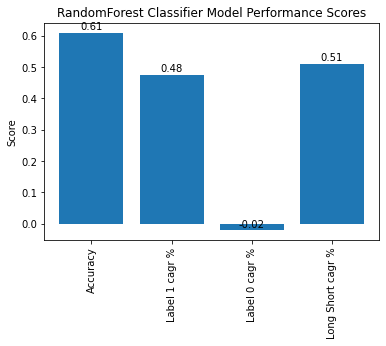

In [12]:
import matplotlib.pyplot as plt


# Create a list of metric names
metrics = ['Accuracy', 'Label 1 cagr %', 'Label 0 cagr %', 'Long Short cagr %']

cagr_Long, cagr_Short, cagr_LongShort = evaluate_model3(rf_classifier, X ,Yact)

# Create a list of metric scores
scores = [accuracy, cagr_Long , cagr_Short , cagr_LongShort ]

# Plot the bar chart
plt.bar(metrics, scores)

plt.xticks(rotation='vertical')

# Display the score numbers on the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, str(round(score, 2)), ha='center')

# Set the y-axis label
plt.ylabel('Score')

# Set the plot title
plt.title('RandomForest Classifier Model Performance Scores')

# Display the plot
plt.show()

# Appendix: Workings for ftute models